In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

In [10]:
train = pd.read_csv("vista_enhancer_train.csv")
val = pd.read_csv("vista_enhancer_val.csv")
test = pd.read_csv("vista_enhancer_test.csv")
combined = pd.concat([train, val, test])

In [11]:
train.head()

,sequence,label
0,aaggtcatttcccttgaaatcttcaggtcggtttcccacttgcttt...,0
1,cacagaatttaaggccccacagaaacttaagggtagaaaaaaggaa...,1
2,cagccatgatctttccgtttaccacattgcaatgaggagggaagaa...,1
3,caccgtgatttcgcttactgctgcatccctaaagcaaaacagagtt...,1
4,tgcttcagttggtccctcatctccgtcaaccacaggcacttgtggg...,1


In [12]:
train["seq_len"] = train["sequence"].apply(lambda x: len(x))
val["seq_len"] = val["sequence"].apply(lambda x: len(x))
test["seq_len"] = test["sequence"].apply(lambda x: len(x))
combined["seq_len"] = combined["sequence"].apply(lambda x: len(x))

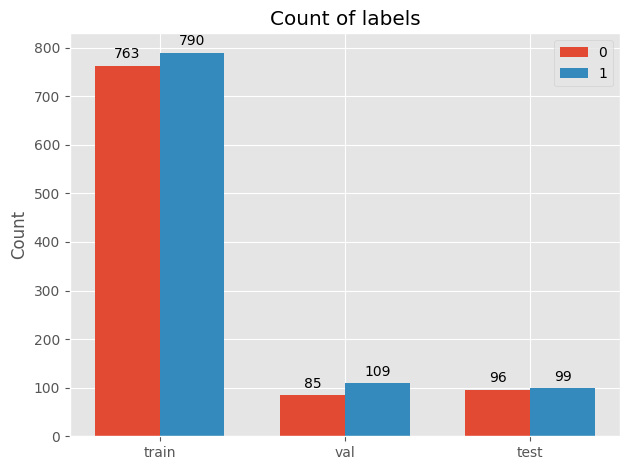

In [13]:
labels = ["train", "val", "test"]
zeros = [train.label.value_counts()[0], val.label.value_counts()[0], test.label.value_counts()[0]]
ones = [train.label.value_counts()[1], val.label.value_counts()[1], test.label.value_counts()[1]]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width / 2, zeros, width, label='0')
rects2 = ax.bar(x + width / 2, ones, width, label='1')

ax.set_ylabel('Count')
ax.set_title('Count of labels')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [14]:
max_seq_len = combined["seq_len"].max()
min_seq_len = combined["seq_len"].min()
avg_seq_len = combined["seq_len"].mean()

print(f"Max Sequence Length: {max_seq_len}")
print(f"Min Sequence Length: {min_seq_len}")
print(f"Avg Sequence Length: {int(avg_seq_len)}")

Max Sequence Length: 8062
Min Sequence Length: 315
Avg Sequence Length: 1916


<AxesSubplot:>

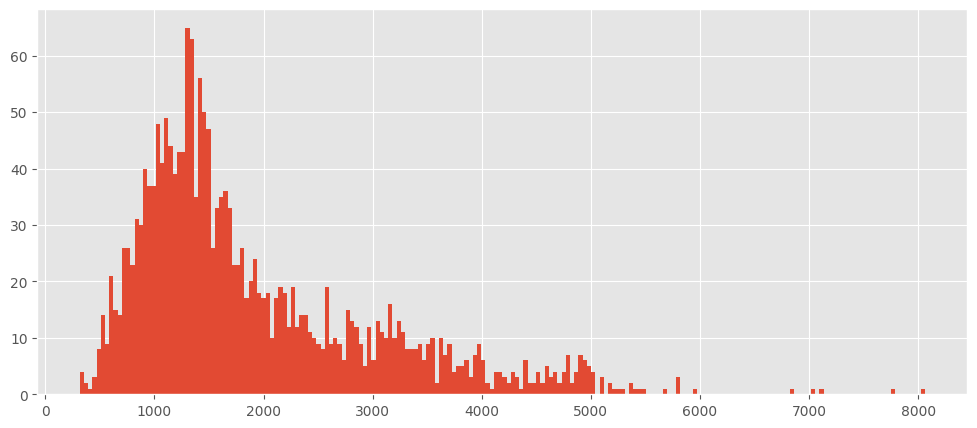

In [15]:
combined.seq_len.hist(bins=200, figsize=(12, 5))

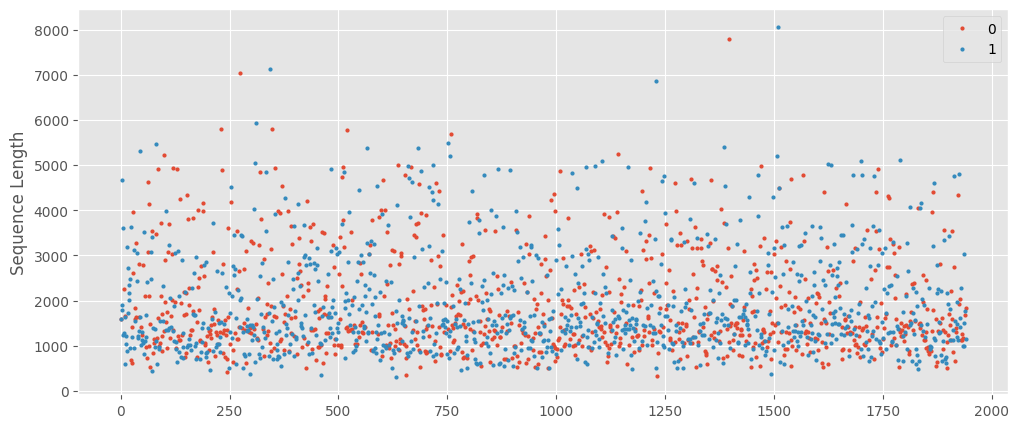

In [16]:
groups = combined.reset_index().groupby('label')

fig, axs = plt.subplots(figsize=(12, 5))
for name, group in groups:
    plt.plot(group.index, group.seq_len, marker='o', linestyle='', markersize=2, label=name)

axs.set_ylabel('Sequence Length')
plt.legend()